# Aim : To do the forecast for next 1 year (next 12 time periods)

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset

data = r"C:\Users\Abhinandan\Desktop\AirPassengers.csv"

airpas=pd.read_csv(data)

In [3]:
# preview of dataset (top 5)

airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# preview of dataset (last 5)

airpas.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
# dimensions of datset

airpas.shape

(144, 2)

In [6]:
# this data is from jan 1949 to till dec 1960 , 12 years monthly data.

# if pasengers is the volume of pasengers in 1000's per month


# Aim : do the forecast for next 1 year (next 12 time periods)

In [7]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format=True)
ind_airpas = airpas.set_index(['Month'])  # month has been indexed

ind_airpas.head()

# first we r converting into datetime format
# then set the column 'Month' as index. for drawing graph. 

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


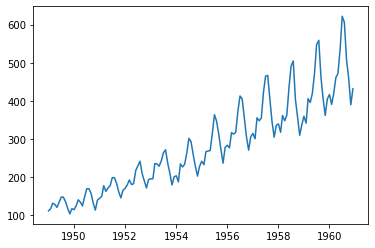

In [8]:
plt.plot(ind_airpas)

# plotting graph on data

In [9]:
#Note == arima can't handle seasonality

In [10]:
ind_airpas.diff()
#  differncing (statinarity)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


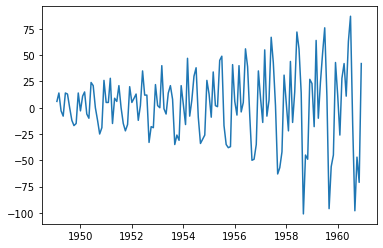

In [11]:
plt.plot(ind_airpas.diff())

# After level 1 differncing

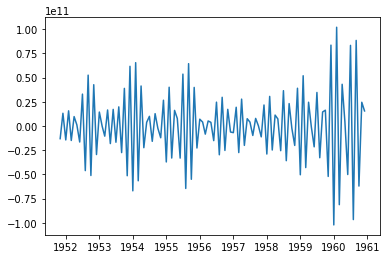

In [12]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

In [13]:
# data is not converting into stationarity so we r taking log

In [14]:
# I will take a log (log transformation)

In [15]:
ind_airpas_log = np.log(ind_airpas)

In [16]:
ind_airpas_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


# Note

In [17]:
# avoid taking log when your any value is zero or negative

In [18]:
# if wwe r achiveing stationarity then don't take log

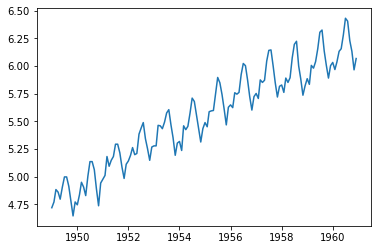

In [19]:
plt.plot(ind_airpas_log)

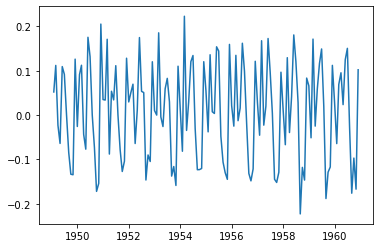

In [20]:
plt.plot(ind_airpas_log.diff())

In [21]:
# Now this data is stationary

In [22]:
# my original series is changed and its now log--- 
# so model would be build o Log data so forecast also in terms of log so we will taking antLog

In [23]:
#value of d is 1 (differncing level 1)

In [24]:
# from statsmodels.tsa.stattools import acf , pacf    # ignore
from statsmodels.tsa.arima_model import ARIMA

In [25]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

# ACF Plot

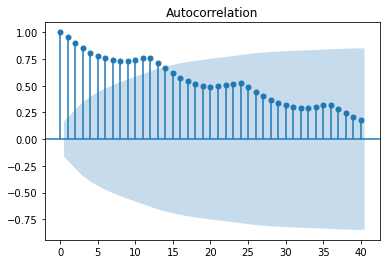

In [26]:
plot_acf(ind_airpas_log.Passengers, lags=40);

As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

# PACF Plot

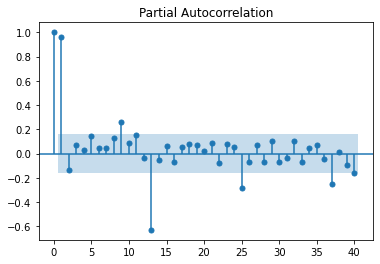

In [27]:
plot_pacf(ind_airpas_log.Passengers, lags=40);

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

#Now values are

# P = 2
# d = 1
# q = 0

In [28]:
# Arima model 

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ind_airpas_log , order =(2,1,0))

C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [30]:
result = model.fit()   # model created

In [31]:
result.params    # values of Constant , psi1  - when ar.L1  , k1 =when ma.L1

const                 0.009600
ar.L1.D.Passengers    0.235864
ar.L2.D.Passengers   -0.172474
dtype: float64

In [32]:
forecast_values = result.forecast(steps=12)   # prediction of 1 year

In [33]:
forecast_values   # 1st array is forcast

# 2nd array error

# 3rd array is confidence interval

(array([6.13038725, 6.13635264, 6.13606416, 6.14395851, 6.15486152,
        6.16506284, 6.17457975, 6.18405624, 6.19364126, 6.20325883,
        6.21286537, 6.22246369]),
 array([0.10248369, 0.16292524, 0.1992398 , 0.2264801 , 0.25095755,
        0.27376969, 0.29490959, 0.31457336, 0.33305177, 0.35056068,
        0.36724061, 0.38319578]),
 array([[5.92952291, 6.33125159],
        [5.81702504, 6.45568025],
        [5.74556134, 6.52656699],
        [5.70006567, 6.58785134],
        [5.66299375, 6.64672928],
        [5.62848411, 6.70164157],
        [5.59656757, 6.75259193],
        [5.5675038 , 6.80060869],
        [5.54087179, 6.84641072],
        [5.51617253, 6.89034514],
        [5.49308699, 6.93264375],
        [5.47141377, 6.97351362]]))

In [34]:
forecast_values[0]    # forecast

array([6.13038725, 6.13635264, 6.13606416, 6.14395851, 6.15486152,
       6.16506284, 6.17457975, 6.18405624, 6.19364126, 6.20325883,
       6.21286537, 6.22246369])

In [35]:
# taking antilog 

np.round(np.exp(forecast_values[0]))   # forcasted values of next 1 year

array([460., 462., 462., 466., 471., 476., 480., 485., 490., 494., 499.,
       504.])

# Below codes are for plots only to check forcasted values

In [36]:
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df = np.round(np.exp(forecast_values_df))  

In [37]:
forecast_values_df

,0
0,460.0
1,462.0
2,462.0
3,466.0
4,471.0
5,476.0
6,480.0
7,485.0
8,490.0
9,494.0


In [38]:
# renaming the column

forecast_values_df.rename(columns= {forecast_values_df.columns[0] : 'Predicted'} , inplace = True) 

In [39]:
#forecast_values_df

In [40]:
date_for_pred = ['1961-01-01'  , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01', 
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']

# our data is to the 1960
# so for checking prediction we taking this values
# put only that much values that you have done forecast

In [41]:
forecast_values_df  = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)

In [42]:
forecast_values_df

,Predicted,0
0,460.0,1961-01-01
1,462.0,1961-02-01
2,462.0,1961-03-01
3,466.0,1961-04-01
4,471.0,1961-05-01
5,476.0,1961-06-01
6,480.0,1961-07-01
7,485.0,1961-08-01
8,490.0,1961-09-01
9,494.0,1961-10-01


In [43]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True) 

In [44]:
forecast_values_df

,Predicted,Month
0,460.0,1961-01-01
1,462.0,1961-02-01
2,462.0,1961-03-01
3,466.0,1961-04-01
4,471.0,1961-05-01
5,476.0,1961-06-01
6,480.0,1961-07-01
7,485.0,1961-08-01
8,490.0,1961-09-01
9,494.0,1961-10-01


In [45]:
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )


In [46]:
forecast_values_df

,Predicted,Month
0,460.0,1961-01-01
1,462.0,1961-02-01
2,462.0,1961-03-01
3,466.0,1961-04-01
4,471.0,1961-05-01
5,476.0,1961-06-01
6,480.0,1961-07-01
7,485.0,1961-08-01
8,490.0,1961-09-01
9,494.0,1961-10-01


In [47]:
pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas.head()

,Predicted
Month,
1961-01-01,460.0
1961-02-01,462.0
1961-03-01,462.0
1961-04-01,466.0
1961-05-01,471.0


<AxesSubplot:xlabel='Month'>

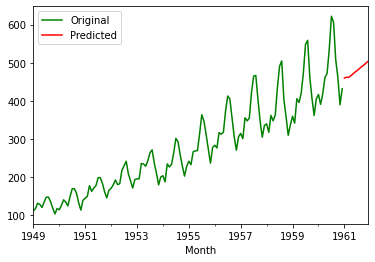

In [48]:
ind_airpas['Passengers'].plot(legend = True , label = "Original" , color ="green")
pred_airpas['Predicted'].plot(legend = True , label = "Predicted" , color ="red")
# plot using pandas

In [49]:
# Now you can see precition is so weak (red colour)
# it can not capture seasonality
# it captures trend but not seasonality

# code with train and test

In [50]:
# No random sampling

In [51]:
data = r"C:\Users\Abhinandan\Desktop\AirPassengers.csv"

airpas=pd.read_csv(data)


airpas.Month  = pd.to_datetime(airpas.Month, infer_datetime_format= True )
ind_airpas = airpas.set_index(['Month']) 

# Sequential sampling

In [52]:
train   = ind_airpas.iloc[0:132]# 1st 11 years in train
test =    ind_airpas.iloc[132:144]  #last 1 year in test

<AxesSubplot:xlabel='Month'>

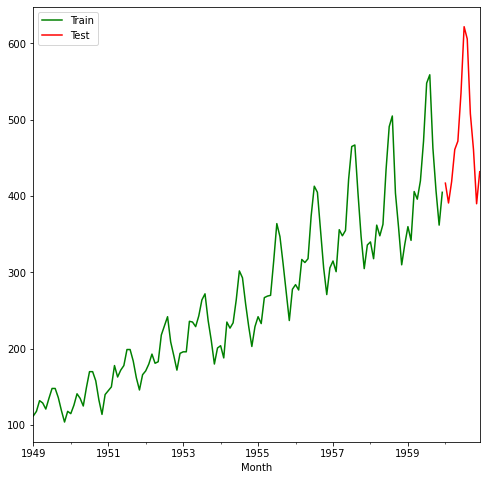

In [53]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")


# for explatnation only

In [54]:
train_log   = np.log(train)

In [55]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log , order =(6,1,2))


C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [56]:
result          = model.fit()
forecast_values = result.forecast(steps = 12)
forecast_values

# this time forecasting for year 1960

C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Abhinandan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
remove

(array([6.05921727, 5.99476232, 5.97147241, 6.00019014, 6.160917  ,
        6.35382739, 6.41206782, 6.35408072, 6.24022065, 6.16007145,
        6.14960229, 6.13851254]),
 array([33259.65199379, 41392.41035524, 42150.92017805, 42417.85688185,
        42472.20095365, 46242.63111073, 53265.65194021, 55704.04727911,
        56126.24784888, 56136.84687914, 56563.77928933, 59385.04168496]),
 array([[ -65181.66082888,   65193.77926343],
        [ -81121.63876725,   81133.62829189],
        [ -82608.31399178,   82620.2569366 ],
        [ -83131.47159966,   83143.47197995],
        [ -83237.8232963 ,   83250.14513029],
        [ -90627.5377    ,   90640.24535478],
        [-104392.34734803,  104405.17148366],
        [-109171.57237945,  109184.28054088],
        [-109999.18415053,  110011.66459182],
        [-110020.0380173 ,  110032.3581602 ],
        [-110856.82063428,  110869.11983886],
        [-116386.40441038,  116398.68143546]]))

In [57]:
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df = np.exp(forecast_values_df)


In [58]:
forecast_values_df

,0
0,428.040268
1,401.321287
2,392.082551
3,403.505511
4,473.862406
5,574.688061
6,609.151993
7,574.833663
8,512.971683
9,473.461902


In [59]:
date_for_pred = ['1960-01-01'  , '1960-02-01' ,
                 '1960-03-01', '1960-04-01','1960-05-01', 
                 '1960-06-01', '1960-07-01','1960-08-01',
                 '1960-09-01', '1960-10-01','1960-11-01',
                 '1960-12-01']
# dates created for 1960

In [60]:
forecast_values_df  = pd.concat([  pd.Series(date_for_pred )  , forecast_values_df] , axis = 1)

In [61]:
l1 = [ 'Month'  , 'Passengers']

forecast_values_df.columns = l1

forecast_values_df.head()

,Month,Passengers
0,1960-01-01,428.040268
1,1960-02-01,401.321287
2,1960-03-01,392.082551
3,1960-04-01,403.505511
4,1960-05-01,473.862406


In [62]:
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True ) 
forecast_values_df = forecast_values_df.set_index(['Month'])


<AxesSubplot:xlabel='Month'>

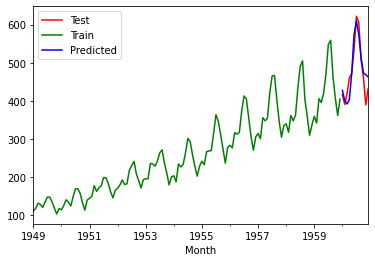

In [63]:
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
forecast_values_df['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")

# lets evaluate the model using numbers

In [64]:
np.mean(np.square(forecast_values_df.Passengers  - test.Passengers))


#MSE for p= 1 , d = 0 , q = 1

1192.0358185335092

In [65]:
np.mean(np.square(forecast_values_df.Passengers  - test.Passengers))

#MSE for p= 1 , d= 0, q = 2

1192.0358185335092

In [66]:
# try different combinations of p and q and check which one gives the least MSE


# Date 18-11-2021

In [67]:
import warnings
warnings.filterwarnings('ignore') ##these 2 linews for ignoring warnings
from sklearn.metrics import mean_squared_error
mse_list =[]
p_list = []
q_list = []
p_old = 1
for p in range(1,7):
    print("---------------------------------------")
    print("Value of P change from ------->",p_old , "New value of P --------->" , p)
    print("-----------------------------------------")
    for q in range(1,5):
        p_list.append(p)
        q_list.append(q)
        model = ARIMA(train_log, order =(p,1,q))
        result = model.fit()
        forecast_values = result.forecast(steps=12)
        forecast_values_df =pd.DataFrame(forecast_values[0])
        forecast_values_df =np.exp(forecast_values_df)
        mse = mean_squared_error(forecast_values_df, test)
        mse_list.append(mse)
        print("Value of p is ",p, "Value of q is ", q , "Value of mse is", mse);
        p_old =p

---------------------------------------
Value of P change from -------> 1 New value of P ---------> 1
-----------------------------------------
Value of p is  1 Value of q is  1 Value of mse is 6374.913445690942
Value of p is  1 Value of q is  2 Value of mse is 5851.3780969489635
Value of p is  1 Value of q is  3 Value of mse is 5860.766205778408
Value of p is  1 Value of q is  4 Value of mse is 6268.1660553019055
---------------------------------------
Value of P change from -------> 1 New value of P ---------> 2
-----------------------------------------
Value of p is  2 Value of q is  1 Value of mse is 6702.793333551538
Value of p is  2 Value of q is  2 Value of mse is 3749.2815452152577
Value of p is  2 Value of q is  3 Value of mse is 3828.0668175824117
Value of p is  2 Value of q is  4 Value of mse is 8708.078486011147
---------------------------------------
Value of P change from -------> 2 New value of P ---------> 3
-----------------------------------------
Value of p is  3 Val

# Working on SARIMA

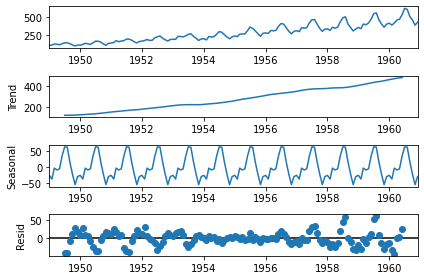

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_res = seasonal_decompose(ind_airpas)
decompose_res.plot();

In [69]:
#pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima
from pmdarima import auto_arima

In [71]:
auto_arima(ind_airpas_log , seasonal=True , m= 12)


ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [72]:
model_sarima = SARIMAX(ind_airpas_log , order=(2,0 ,0), seasonal_order=(0,1,1,12))

results =  model_sarima.fit()

In [73]:
abc= results.predict()

In [74]:
len(abc)

144

In [75]:
# control preduction bu start and end

# Prediction for year 1960 and compairing it with actual data of  yesr 1960

In [76]:
results.predict(start=132, end= 143)   #1960

1960-01-01    6.039150
1960-02-01    5.984949
1960-03-01    6.128366
1960-04-01    6.039700
1960-05-01    6.131101
1960-06-01    6.305712
1960-07-01    6.415847
1960-08-01    6.436395
1960-09-01    6.238580
1960-10-01    6.097121
1960-11-01    5.991878
1960-12-01    6.083892
Freq: MS, Name: predicted_mean, dtype: float64

In [77]:
results.predict(start=144, end= 155)  # prediction for year 1961

# for explanation

1961-01-01    6.103840
1961-02-01    6.045845
1961-03-01    6.162625
1961-04-01    6.188951
1961-05-01    6.220984
1961-06-01    6.355967
1961-07-01    6.493269
1961-08-01    6.487662
1961-09-01    6.308238
1961-10-01    6.191354
1961-11-01    6.044633
1961-12-01    6.147981
Freq: MS, Name: predicted_mean, dtype: float64

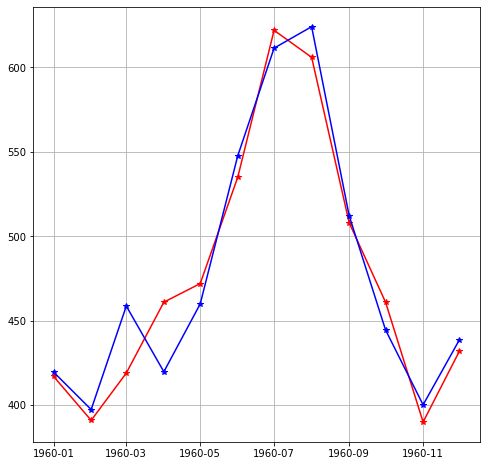

In [78]:
pred = results.predict(start = 132, end = 143)
actual_pred = np.exp(pred)
actual_pred

plt.figure(figsize=(8,8))
plt.plot(ind_airpas[132:144], marker = "*", color ="r", label ="actual")
plt.plot(actual_pred , marker = "*", color ="b", label ="forecasted")

plt.grid()

In [79]:
actual_pred

1960-01-01    419.536298
1960-02-01    397.402342
1960-03-01    458.686062
1960-04-01    419.767049
1960-05-01    459.942218
1960-06-01    547.691521
1960-07-01    611.458426
1960-08-01    624.152714
1960-09-01    512.131020
1960-10-01    444.575978
1960-11-01    400.165437
1960-12-01    438.733529
Freq: MS, Name: predicted_mean, dtype: float64

In [80]:
# MSE

mse = mean_squared_error(actual_pred, ind_airpas[132:144]  )
mse

375.430290884626

In [81]:
# percentage error

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual_pred, ind_airpas[132:144] )

0.032364828421176876

# Future prediction of year 1961

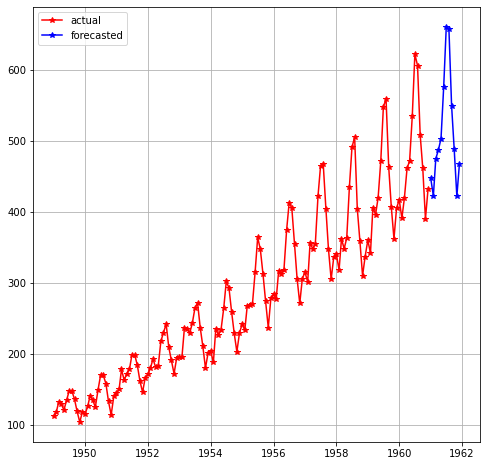

In [82]:
next12 = results.predict(start= 144, end = 155)    #for next 12 months
next12 = np.exp(next12)
next12

plt.figure(figsize=(8,8))
plt.plot(ind_airpas, marker = "*", color ="r", label ="actual")
plt.plot(next12 , marker = "*", color ="b", label ="forecasted")
plt.grid()
plt.legend()

we can see our model is doing very good prediction